## Download and prepare the dataset

Set up the posits as default

In [44]:
import tensorflow.python.keras as k
k.backend.set_floatx("posit160")
k.backend.floatx()


'posit160'

In [47]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="posit160")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:20000].reshape((20000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:20000])
test_labels = to_categorical(test_labels)

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [48]:
train_images.shape

(20000, 28, 28, 1)

## Download and prepare the dataset

In [49]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
import dropout

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh", kernel_initializer=random_normal_init))
# model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh"))
# model.add(layers.Dense(10, activation='softmax'))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(dropout.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))


Let's display the architecture of our convnet so far:

In [50]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 32)         

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [51]:
optimizer = k.optimizers.adam_v2.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [52]:
weights_before = model.get_weights()

In [53]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

history = model.fit(train_images, train_labels, epochs=500, batch_size=125, validation_split=0.1, callbacks=[earlystop_callback])

Epoch 1/500
144/144 [==============================] - 280s 2s/step - loss: 547.0000 - accuracy: 0.1719 - val_loss: 179.8750 - val_accuracy: 0.2891
Epoch 2/500
144/144 [==============================] - 264s 2s/step - loss: 136.7500 - accuracy: 0.3496 - val_loss: 67.3125 - val_accuracy: 0.4758
Epoch 3/500
144/144 [==============================] - 255s 2s/step - loss: 68.3750 - accuracy: 0.4592 - val_loss: 34.6875 - val_accuracy: 0.5852
Epoch 4/500
144/144 [==============================] - 236s 2s/step - loss: 50.5000 - accuracy: 0.5364 - val_loss: 21.4531 - val_accuracy: 0.6536
Epoch 5/500
144/144 [==============================] - 231s 2s/step - loss: 31.5312 - accuracy: 0.6011 - val_loss: 13.7188 - val_accuracy: 0.6907
Epoch 6/500
144/144 [==============================] - 230s 2s/step - loss: 22.1719 - accuracy: 0.6282 - val_loss: 9.8633 - val_accuracy: 0.7046
Epoch 7/500
144/144 [==============================] - 221s 2s/step - loss: 15.2305 - accuracy: 0.6533 - val_loss: 7.1641 

In [54]:
weights_after = model.get_weights()

In [55]:
import numpy as np

print(np.array_equal(weights_before[0],weights_after[0]))


print(weights_before[0])
print("==============================")
print(weights_after[0])

False
[[[[0.614258 1.66406 1.53076 -0.784668 0.142151 1.05859 1.01807 1.09521
    1.8877 -0.141479 0.861572 -0.953369 0.0431213 -2.97363 -1.39062
    -0.467529 1.1748 -0.572998 2.06543 0.693115 1.04834 -1.24219
    -0.0320129 0.852783 -1.98779 0.441772 0.564209 0.723389 -0.0661316
    -0.62085 -1.09912 -0.539551]]

  [[-1.3501 -0.0612488 -0.79126 0.63623 0.605713 -0.174133 -1.44189
    1.24414 -1.97217 1.38916 1.30029 -1.5835 0.845459 1.22754 -0.482666
    0.744629 0.93042 -0.344849 -0.482178 -1.53613 0.391479 1.771
    1.38428 -0.319336 -0.616943 0.482422 -1.55957 -0.603271 0.24585
    0.119385 -0.829102 0.651611]]

  [[1.0957 -0.20752 0.0724182 -1.59766 -0.711182 -0.817871 1.45508
    -0.504639 -0.759033 0.434937 1.49658 -0.211792 0.0694885 1.06934
    -1.74365 0.0834351 -1.87842 -0.916992 -1.44238 0.346558 -0.368408
    -1.59277 -0.174072 -0.157349 0.14447 -0.256348 1.78857 1.65967
    0.810303 1.11816 -2.74805 -0.132874]]]


 [[[-0.614258 -0.261108 -0.286377 0.300659 -0.0980225 -0.

**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

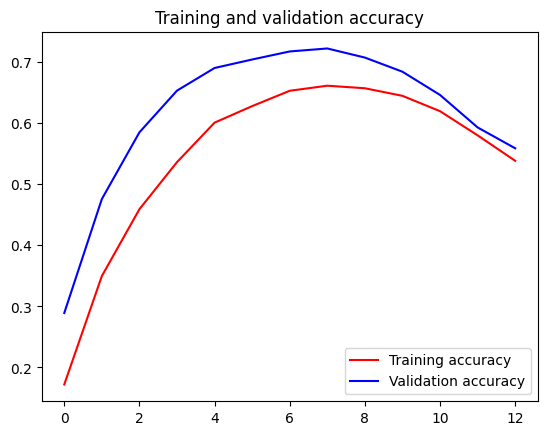

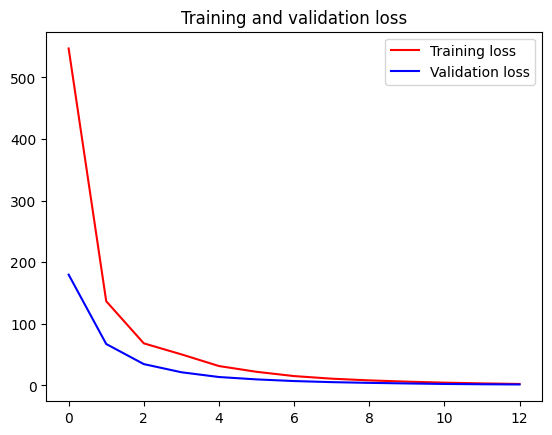

In [56]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [57]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 65s 209ms/step - loss: 1.3716 - accuracy: 0.4775


In [58]:
test_acc

0.477539

In [59]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0.0180054, 0.00715256, 0.213684, 0.734375, 0.000775337,
        0.000823021, 0.000305176, 0.0135422, 0.0119781, 6.58631e-06]],
      dtype=posit160)

In [42]:
print(random_normal_init((10,)))


tf.Tensor(
[-0.25138396  1.7331516  -0.34837875 -0.49174917 -1.0303775   0.65026253
 -1.1111982  -1.276356   -0.8411003  -2.0826323 ], shape=(10,), dtype=float32)


In [43]:
initializer = k.initializers.GlorotUniform()
values = initializer(shape=(10,), dtype="posit160")
print(values)

tf.Tensor(
[-0.546143 -0.544922 -0.545654 -0.539062 -0.545166 -0.541016 -0.544434
 -0.542236 -0.54248 -0.544678], shape=(10,), dtype=posit160)
